In [19]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
# criando a base de dados
# Criando o conjunto de dados
cliente_id = np.array([0,1,2,3,4,5,6,7,8,9,10]) # cria um array
# utilizando a biblioteca numpy
valor_compra = np.array([40,150,500,5000,1834,2350,
                         5000,6740,895,3300,4750])

In [21]:
# Juntando as colunas dos dados
dados_compras = np.column_stack((cliente_id,valor_compra))

In [22]:
dados_compras

array([[   0,   40],
       [   1,  150],
       [   2,  500],
       [   3, 5000],
       [   4, 1834],
       [   5, 2350],
       [   6, 5000],
       [   7, 6740],
       [   8,  895],
       [   9, 3300],
       [  10, 4750]])

In [23]:
# Aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=3) # definindo o numero de clusters
kmeans.fit(dados_compras) # criando o modelo para realizar o agrupamento

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [24]:
sse = kmeans.inertia_
print("SSE: ", sse)

SSE:  4088192.1666666665


In [25]:
#Visualizando os resultados dos argumentos 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

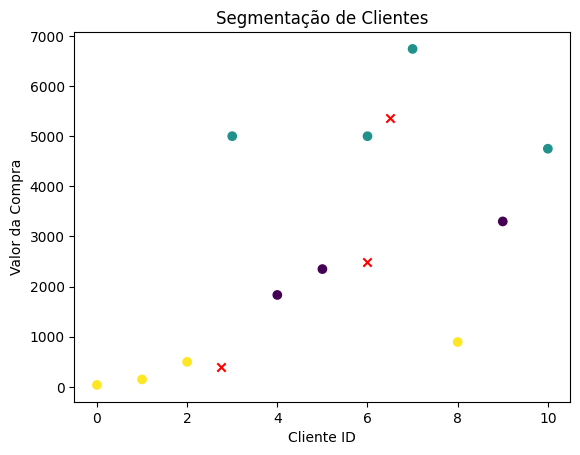

In [26]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados_compras[:, 0], dados_compras[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Cliente ID')
plt.ylabel('Valor da Compra')
plt.title('Segmentação de Clientes')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_score(dados_compras, kmeans.predict(dados_compras))

0.6402592747403472

In [29]:
def avaliacao(dados_compras):
    inercia = []
    silhueta = []

In [33]:
def avaliacao(dados_compras):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_compras)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_compras, kmeans.predict(dados_compras))))
        
    return silhueta, inercia

In [34]:
silhueta, inercia = avaliacao(dados_compras)
silhueta

['k=2 - 0.6474028807916177',
 'k=3 - 0.6402592747403472',
 'k=4 - 0.6304805600706671']

In [31]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

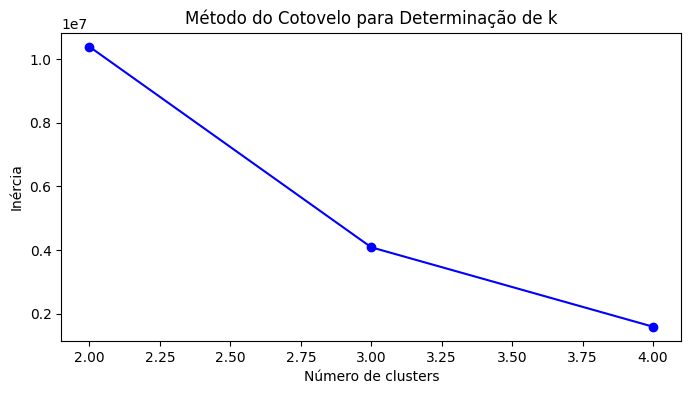

In [35]:
plot_cotovelo(inercia)

In [37]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_n)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_n, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_n, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 3 clusters: 0.640


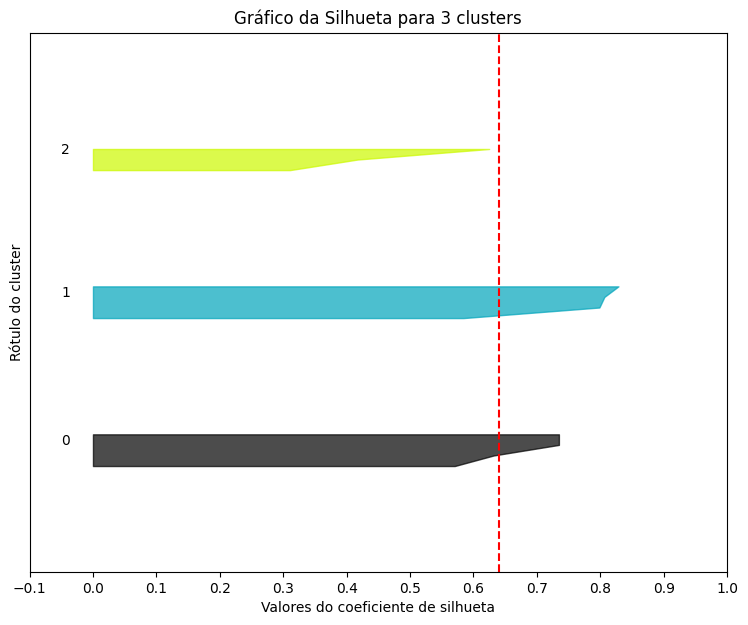

In [40]:
graf_silhueta(3, dados_compras)